In [1]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#importação das biblicates de apoio
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
import datetime

Output hidden; open in https://colab.research.google.com to view.

In [0]:
##Dados retirados do portal da transparência do Distrito Federal por meio do link: http://www.transparencia.df.gov.br/#/licitacoes-contratos/contratos
##Problema: análise exploratória dos contratos de prestação de serviço do Distrito Federal 
##Restrição: a base de dados não representa o universo de contratos 
##Pergunta alvo para responder: número de contratos com valor contratado de até 3.3 milhões e 5.5 milhões

In [0]:
#carregar dados de treino
contratos = pd.read_csv("/content/drive/My Drive/Colab Notebooks/contratos_gdf_analise.csv", delimiter = ';', encoding='iso-8859-1', decimal=',')


In [5]:
contratos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 14 columns):
num_contrato       574 non-null float64
num_original       575 non-null object
unidade_gestora    575 non-null object
credor             575 non-null object
cpf_cnpj           557 non-null float64
gestao             575 non-null object
especie            574 non-null object
num_processo       574 non-null object
Objeto             574 non-null object
data_inicio        573 non-null object
data_fim           573 non-null object
num_aditivos       573 non-null float64
Finalidade         113 non-null object
valor_contrato     573 non-null float64
dtypes: float64(4), object(10)
memory usage: 63.0+ KB


In [6]:
contratos.head()

,num_contrato,num_original,unidade_gestora,credor,cpf_cnpj,gestao,especie,num_processo,Objeto,data_inicio,data_fim,num_aditivos,Finalidade,valor_contrato
0,38516.0,0002/2019,CASA CIVIL DO DISTRITO FEDERAL ...,3CORP TECHNOLOGY S/A INFRAESTRUTURA DE TELECOM...,4.238300e+12,TESOURO ...,SERVIÇOS,00428-0000001652/2018-23,Prestação de manutenção preventiva e corretiva...,18/01/2019,18/01/2020,0.0,Seviços de manutenção com reposição de peças e...,99992.00
1,39164.0,00X2.2019,DEPTO DE ESTRADAS E RODAGEM DO DF - DER/DF ...,3M DO BRASIL LTDA. ...,4.598540e+13,DEPARTAMENTO DE ESTRADAS DE RODAGEM DO DF ...,FORNECIMENTO DE BENS,00113-0000032807/2018-81,AQUISIÇÃO DE PELÍCULA RETRORREFLETIVA. ...,27/05/2019,27/05/2020,0.0,NaN,435000.00
2,38984.0,06/2019,CÂMARA LEGISLATIVA DO DISTRITO FEDERAL ...,A & C REFRIGERAÇÃO E ELÉTRICA LTDA. ...,4.030910e+12,TESOURO ...,SERVIÇOS,00000-0001000960/2017-00,SERVIÇOS DE REMANEJAMENTO DOS EQUIPAMENTOS DE ...,17/04/2019,16/07/2019,0.0,NaN,68999.99
3,39166.0,00XX4.2019,DEPTO DE ESTRADAS E RODAGEM DO DF - DER/DF ...,A. DA SILVA LIMA COM. DE EQUIP. EM GERAL- ME ...,2.005050e+13,DEPARTAMENTO DE ESTRADAS DE RODAGEM DO DF ...,FORNECIMENTO DE BENS,00113-0000032807/2018-81,AQUISIÇÃO DE PELÍCULA RETRORREFLETIVA. ...,27/05/2019,27/05/2020,0.0,NaN,63992.32
4,38572.0,008/2019,SECRETARIA DE EST. DE SEGURANÇA PÚBLICA DO DF...,AAZ COMERCIAL LTDA EPP ...,1.544950e+13,TESOURO ...,FORNECIMENTO DE BENS,00050-0000002861/2019-64,"CONTRATO Nº 008/2019 - SSP, FIRMADO COM A EMPR...",29/01/2019,31/12/2019,0.0,AQUISIÇÃO DE GARRAFÃO RETORNÁVEL PARA ÁGUA MIN...,6379.80


In [7]:
#top unidade gestora
contratos['unidade_gestora'].value_counts().head(10)

DEPTO DE ESTRADAS E RODAGEM DO DF - DER/DF            54
SECRETARIA DE ESTADO DE EDUCAÇÃO DO DF                39
SECRETARIA DE ESTADO DE SAÚDE DO DISTRITO FEDERAL     26
SECRETARIA DE EST. DE  SEGURANÇA PÚBLICA DO DF        22
AG. REG. DE ÁGUAS E SAN. BÁSICO DO DF - ADASA         20
FUNDAÇÃO HEMOCENTRO DE BRASÍLIA - FHB                 20
SEÇÃO DE ORÇAMENTO DA SECRETARIA DE FAZENDA           19
FUNDAÇÃO JARDIM ZOOLÓGICO DE BRASÍLIA                 18
SECRETARIA DE EST. DE CULTURA DO DISTRITO FEDERAL     17
COMPANHIA URB. DA NOVA CAPITAL DO BRASIL-NOVACAP      17
Name: unidade_gestora, dtype: int64

In [8]:
#top credor
contratos['credor'].value_counts().head(10)

CEB DISTRIBUIÇÃO S.A.                                                                                33
INDÚSTRIA DE ÁGUA MINERAL IBIÁ LTDA ME                                                               25
COMPANHIA DE SANEAMENTO AMBIENTAL DO DF - CAESB                                                      23
DEDETIZADORA FOLHA EIRELI - ME                                                                       14
P&P TURISMO EIRELI - EPP                                                                             13
VCS COMERCIO E SERV. DE CHAVEIROS E CARIMBOS LTDA                                                    12
UG-FUNDAÇÃO DE AMPARO AO TRABALHADOR PRESO - FUNAP * GESTÃO-FUNDACAO DE AMPARO AO TRABALHOR PRESO    11
PROMOFOTO COMÉRCIO & IMPORTAÇÃO LTDA.                                                                 8
HBL - CARIMBOS E PLACAS IND. E COM. LTDA - ME                                                         8
OI S.A - EM RECUPERAÇÃO JUDICIAL                                

In [9]:
#tipo de contrato 

contratos['especie'].value_counts()

SERVIÇOS                334
FORNECIMENTO DE BENS    218
OBRAS                    16
ALUGUÉIS                  4
SEGUROS                   2
Name: especie, dtype: int64

In [12]:
#valor médio do contratos
contratos['valor_contrato'].mean()


1270528.5554101225

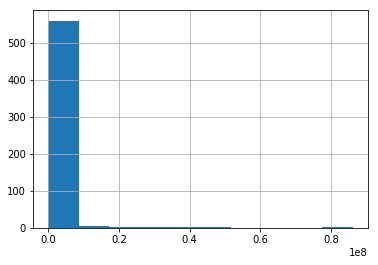

In [14]:
#histograma com valor do contrato

contratos['valor_contrato'].hist()

In [17]:
#Contratos com valores acima de 3.3 milhões
contratosate3milhoes = contratos[contratos['valor_contrato']< 3300000 ]
contratosate3milhoes.describe()

,num_contrato,cpf_cnpj,num_aditivos,valor_contrato
count,541.000000,5.240000e+02,541.000000,5.410000e+02
mean,38349.957486,1.750146e+13,0.048059,2.940629e+05
std,2875.834435,1.917816e+13,0.480645,5.623855e+05
min,3906.000000,2.080001e+08,0.000000,1.000000e-02
25%,38634.000000,5.655160e+12,0.000000,9.314100e+03
50%,38819.000000,1.071970e+13,0.000000,5.000000e+04
75%,38979.000000,2.304330e+13,0.000000,2.631288e+05
max,39170.000000,9.142150e+13,9.000000,3.145428e+06


In [18]:
#Contratos com valores acima de 5 milhões
contratosate5milhoes = contratos[contratos['valor_contrato']> 5000000 ]
contratosate5milhoes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 52 to 563
Data columns (total 14 columns):
num_contrato       25 non-null float64
num_original       25 non-null object
unidade_gestora    25 non-null object
credor             25 non-null object
cpf_cnpj           25 non-null float64
gestao             25 non-null object
especie            25 non-null object
num_processo       25 non-null object
Objeto             25 non-null object
data_inicio        25 non-null object
data_fim           25 non-null object
num_aditivos       25 non-null float64
Finalidade         1 non-null object
valor_contrato     25 non-null float64
dtypes: float64(4), object(10)
memory usage: 2.9+ KB


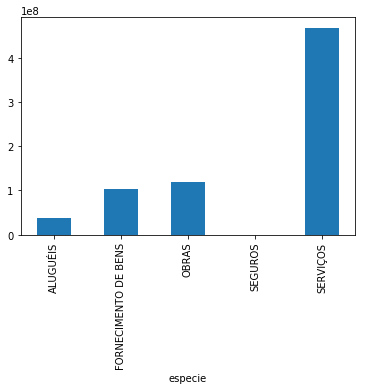

In [19]:
## somatório de valor do contrato por espécie de serviço
contratos.groupby('especie')['valor_contrato'].sum().plot.bar()


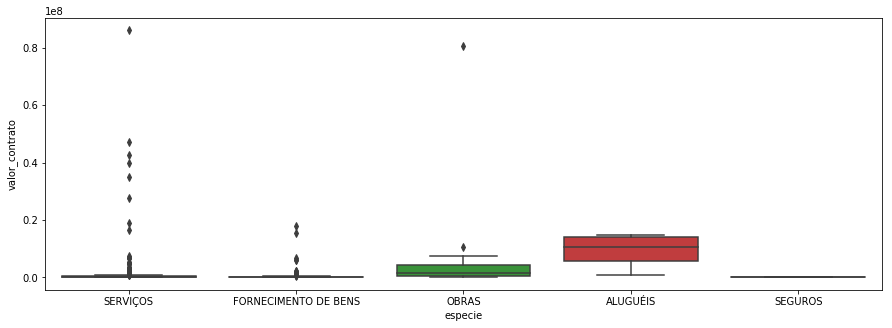

In [26]:
##valor contratado por espécie

plt.figure(figsize=(15,5))

sns.boxplot(y='valor_contrato', x='especie', data=contratos)

In [27]:
#tipo de espécie por execução em órgão e valor
contratos.groupby(['especie','unidade_gestora']).sum()

num_contrato  ...  valor_contrato
especie              unidade_gestora                                                   ...                
ALUGUÉIS             INSTITUTO DE MEIO AMBIENTE E REC. HÍDRICOS DO DF         39024.0  ...    1.465706e+07
                     SECRETARIA DE ESTADO DE EDUCAÇÃO DO DF                   78018.0  ...    1.483944e+07
                     SEÇÃO DE ORÇAMENTO DA SECRETARIA DE FAZENDA              38827.0  ...    7.308274e+06
FORNECIMENTO DE BENS ADMINISTRAÇÃO REGIONAL DA CANDANGOLÂNDIA                156167.0  ...    2.532470e+03
                     ADMINISTRAÇÃO REGIONAL DE  BRAZLANDIA                   155767.0  ...    6.844760e+03
                     ADMINISTRAÇÃO REGIONAL DE CEILÂNDIA                      38955.0  ...    3.844000e+03
                     ADMINISTRAÇÃO REGIONAL DE SOBRADINHO                     39138.0  ...    1.922000e+03
                     ADMINISTRAÇÃO REGIONAL DE SÃO SEBASTIÃO                  38893.0  ...    7.969500e+03
                     ADMINISTRAÇÃO REGIONAL DE TAGUATINGA                     38810.0  ...    6.900000e+03
                     ADMINISTRAÇÃO REGIONAL DE VICENTE PIRES                  38862.0  ...    1.633000e+03
                     ADMINISTRAÇÃO REGIONAL DE ÁGUAS CLARAS                  230760.0  ...    1.465227e+05
                     ADMINISTRAÇÃO REGIONAL DO  NÚCLEO BANDEIRANTE            39140.0  ...    9.610000e+02
                     ADMINISTRAÇÃO REGIONAL DO LAGO SUL                       77634.0  ...    1.538090e+03
                     ADMINISTRAÇÃO REGIONAL DO RIACHO FUNDO                   38613.0  ...    5.520000e+03
                     ADMINISTRAÇÃO REGIONAL SETOR IND. E ABASTECIMENTO        77422.0  ...    1.871550e+03
                     AG. REG. DE ÁGUAS E SAN. BÁSICO DO DF - ADASA            77543.0  ...    5.006000e+03
                     AGÊNCIA DE FISCALIZAÇÃO DO DISTRITO FEDERAL-AGEFIS       77510.0  ...    1.864375e+04
                     CASA CIVIL DO DISTRITO FEDERAL                          116825.0  ...    7.584600e+04
                     COMPANHIA DE DESENV. DA HABITAÇÃO  DO DF - CODHAB        77545.0  ...    1.931788e+04
                     COMPANHIA DE PLANEJ. DO DISTRITO FEDERAL-CODEPLAN        77819.0  ...    3.946652e+05
                     COMPANHIA DO METROPOLITANO DO DF - METRÔ-DF              77653.0  ...    2.940193e+05
                     COMPANHIA URB. DA NOVA CAPITAL DO BRASIL-NOVACAP        583983.0  ...    1.359000e+06
                     CÂMARA LEGISLATIVA DO DISTRITO FEDERAL                  116328.0  ...    7.758880e+04
                     DEFENSORIA PÚBLICA DO DISTRITO FEDERAL                  193592.0  ...    2.871932e+05
                     DEPTO DE ESTRADAS E RODAGEM DO DF - DER/DF             1397184.0  ...    4.549323e+06
                     FUNDAÇÃO DE APOIO A PESQUISA DO DF - FAP                 39134.0  ...    4.616100e+03
                     FUNDAÇÃO DE ENS. E PESQ. EM CIÊNC. DA SAÚDE-FEPECS       38702.0  ...    2.732400e+04
                     FUNDAÇÃO HEMOCENTRO DE BRASÍLIA - FHB                   427080.0  ...    2.405063e+06
                     FUNDAÇÃO JARDIM ZOOLÓGICO DE BRASÍLIA                   311561.0  ...    4.741930e+05
                     FUNDO DA PROCURADORIA DO DISTRITO FEDERAL               232272.0  ...    3.971426e+05
...                                                                               ...  ...             ...
SERVIÇOS             FUNDAÇÃO JARDIM ZOOLÓGICO DE BRASÍLIA                   386118.0  ...    6.324214e+06
                     FUNDO DA PROCURADORIA DO DISTRITO FEDERAL                39064.0  ...    1.092000e+04
                     FUNDO DE ASSISTÊNCIA À SAÚDE DA CLDF.                    47045.0  ...    4.600000e+07
                     FUNDO DE DESENV. URBANO DO DISTRITO FEDERAL              38436.0  ...    3.294000e+04
                     FUNDO DE SAÚDE DO CORPO DE BOMBEIROS                     26299.0  ...    1.500000e+05
       

In [28]:
#valor médio dos contratos
contratos.groupby('credor')['valor_contrato'].mean()

credor
0                                                                                                                       NaN
3CORP TECHNOLOGY S/A INFRAESTRUTURA DE TELECOM S/A                                                             9.999200e+04
3M DO BRASIL LTDA.                                                                                             4.350000e+05
A & C REFRIGERAÇÃO E ELÉTRICA LTDA.                                                                            6.899999e+04
A. DA SILVA LIMA COM. DE EQUIP. EM GERAL- ME                                                                   6.399232e+04
AAZ COMERCIAL LTDA EPP                                                                                         2.046488e+04
ACTS DO BRASIL LTDA                                                                                            9.717965e+04
ADEMAR LUIZ GELAIN                                                                                             1.035429e+05
A

In [0]:
#converter texto em data
contratos['nova_data'] = pd.to_datetime(contratos['data_inicio'])

In [0]:
#criar nova coluna referente ao mÊs da data
contratos['mes'] = contratos['nova_data'].apply(lambda x: x.month)

In [31]:
#frequencia de meses
contratos['mes'].value_counts()

1.0     115
4.0     101
3.0      95
5.0      86
2.0      78
7.0      18
8.0      18
10.0     14
6.0      13
12.0     12
9.0      12
11.0     11
Name: mes, dtype: int64

In [0]:
#mappung de meses
dmap = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}

In [0]:
#aplicar filtro
contratos['mes_nome'] = contratos['mes'].map(dmap)

In [34]:
contratos['mes_nome'].value_counts()

Jan    115
Abr    101
Mar     95
Mai     86
Fev     78
Ago     18
Jul     18
Out     14
Jun     13
Set     12
Dez     12
Nov     11
Name: mes_nome, dtype: int64

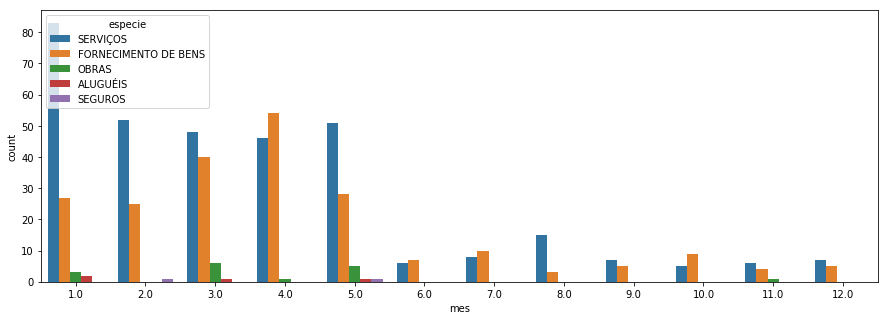

In [35]:
##número de contratos por tipo e mes

plt.figure(figsize=(15,5))

sns.countplot(hue='especie', x='mes', data=contratos)

In [0]:
contratos.xs(key='valor_contrato', axis=1, level='').max()

86114370.48

In [37]:
contratos['valor_contrato'].describe()


count    5.730000e+02
mean     1.270529e+06
std      6.371908e+06
min      1.000000e-02
25%      1.074980e+04
50%      6.000000e+04
75%      3.835800e+05
max      8.611437e+07
Name: valor_contrato, dtype: float64

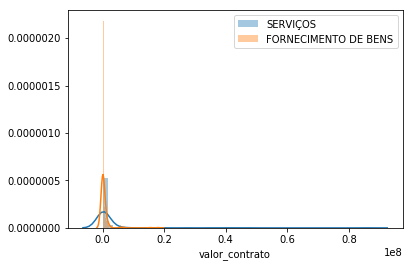

In [41]:
sns.distplot(contratos[contratos['especie'] == 'SERVIÇOS']['valor_contrato'].dropna(), label='SERVIÇOS')
sns.distplot(contratos[contratos['especie'] == 'FORNECIMENTO DE BENS']['valor_contrato'].dropna(), label='FORNECIMENTO DE BENS')
plt.legend()


In [52]:
contratos.groupby('unidade_gestora')['valor_contrato'].mean()


unidade_gestora
21/03/2020                                                     NaN
ADMINISTRAÇÃO REGIONAL DA CANDANGOLÂNDIA              8.312940e+02
ADMINISTRAÇÃO REGIONAL DA FERCAL - RA XXXI            1.970060e+05
ADMINISTRAÇÃO REGIONAL DE  BRAZLANDIA                 3.760758e+04
ADMINISTRAÇÃO REGIONAL DE CEILÂNDIA                   1.460449e+05
ADMINISTRAÇÃO REGIONAL DE PLANALTINA                  4.782037e+04
ADMINISTRAÇÃO REGIONAL DE SAMAMBAIA                   3.227700e+03
ADMINISTRAÇÃO REGIONAL DE SOBRADINHO                  1.291050e+03
ADMINISTRAÇÃO REGIONAL DE SOBRADINHO II               4.902971e+04
ADMINISTRAÇÃO REGIONAL DE SÃO SEBASTIÃO               9.874053e+04
ADMINISTRAÇÃO REGIONAL DE TAGUATINGA                  5.628937e+05
ADMINISTRAÇÃO REGIONAL DE VICENTE PIRES               8.753635e+04
ADMINISTRAÇÃO REGIONAL DE ÁGUAS CLARAS                1.666794e+04
ADMINISTRAÇÃO REGIONAL DO  NÚCLEO BANDEIRANTE         1.074299e+05
ADMINISTRAÇÃO REGIONAL DO CRUZEIRO            